## ChatOllama

Ollama를 사용하면 Llama 2와 같은 오픈 소스 대규모 언어 모델을 로컬에서 실행할 수 있습니다.

Ollama는 모델 가중치, 구성 및 데이터를 Modelfile로 정의된 단일 패키지로 번들링합니다.

GPU 사용을 포함하여 설정 및 구성 세부 정보를 최적화합니다

https://ollama.com/

위링크에서 올라마를 다운받고, 필요한 각 모델을 다운받으면 된다.

- ChatOllama 클래스를 사용하여 Ollama 챗 모델을 초기화합니다.
- ChatPromptTemplate 클래스를 사용하여 주어진 템플릿으로부터 프롬프트를 생성합니다.
- LangChain Expressive Language(LCEL) 체인 문법을 사용하여 프롬프트, 언어 모델, 출력 파서를 파이프라인으로 연결합니다.
- chain.invoke() 메서드를 호출하여 주어진 주제에 대한 짧은 농담을 생성합니다.
- 생성된 응답은 터미널에 출력됩니다.

In [1]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# LangChain이 지원하는 다른 채팅 모델을 사용합니다. 여기서는 Ollama를 사용합니다.
# llm = ChatOllama(model="llama3", temperature=0)
# llm = ChatOllama(model="qwen2", temperature=0)
# llm = ChatOllama(model="qwen2:1.5b", temperature=0)
# llm = ChatOllama(model="gemma:2b", temperature=0)
# llm = ChatOllama(model="gemma2", temperature=0)
llm = ChatOllama(model="gemma:2b")


# 주제를 기반으로 짧은 농담을 요청하는 프롬프트 템플릿을 생성합니다.
prompt = ChatPromptTemplate.from_template("{topic} 에 대하여 간략히 설명해 줘.")

# LangChain 표현식 언어 체인 구문을 사용합니다.
# LCEL에 대한 자세한 내용은 https://python.langchain.com/docs/expression_language/why 에서 확인할 수 있습니다.
chain = prompt | llm | StrOutputParser()

# 간결성을 위해 응답은 터미널에 출력됩니다.
# 프로덕션 환경에서 애플리케이션을 배포하기 위해 LangServe를 사용할 수 있습니다.
print(chain.invoke({"topic": "deep learning"}))


**딥러닝**은 데이터를 분석하여 새로운 패턴을 발견하는 과정을 말합니다. 딥러닝은 기계학의 한 분야로, 특히 이미지, 음성, 언어와 같은 복잡한 데이터를 분석할 수 있는 모델을 만듭니다.

딥러닝 모델은 크게 두 가지 그룹으로 나뉘어 분석할 수 있습니다. 

* **시계적 데이터 분석 (SNN)** 모델은 순차적인 데이터를 분석하는 모델로, 의료 이미지, 자율주행 자동차 등의 분야에서 사용됩니다.
* **임계적 데이터 분석 (CNN)** 모델은 이미지와 같은 2D 데이터를 분석하는 모델로, 이미지 분류, 객체 검출 등의 분야에서 사용됩니다.

딥러닝 모델은 기본적으로 다음과 같은 과정을 거칩니다. 

1. 데이터를 입력으로 받아 특징을 추출합니다. 
2. 특징을 기반으로 새로운 패턴을 예측합니다. 
3. 이러한 과정을 반복적으로 수행하여 새로운 패턴을 발견합니다. 

딥러닝 모델은 매우 복잡한 모델이지만, 훈련 과정에서 데이터에 의존적으로 학습한다는 장점이 있습니다. 딥러닝 모델은 다양한 분야에서 사용되는 강력한 기술이므로, 더욱 다양한 분야의 연구와 개발에 활용될 수 있습니다.


LCEL 체인은 기본적으로 응답 스트리밍 및 비동기 지원과 같은 추가 기능을 제공합니다.

- topic 변수에 "Covid 19"이라는 주제를 딕셔너리 형태로 할당합니다.
- chain.stream() 메서드를 사용하여 topic을 입력으로 받아 텍스트를 생성합니다.
- 생성된 텍스트는 청크(chunk) 단위로 반환되며, for 루프를 통해 각 청크를 반복적으로 처리합니다.
- 각 청크는 print() 함수를 사용하여 출력됩니다.

In [2]:
topic = {"topic": "Covid 19"}  # 주제를 "Covid 19"로 설정합니다.

# chain 객체의 stream 메서드를 사용하여 주제에 대한 텍스트를 생성하고, 생성된 텍스트를 chunks 변수에 할당하면서 반복합니다.
for chunks in chain.stream(topic):
    print(chunks, end="", flush=True)  # 생성된 텍스트 조각(chunks)을 출력합니다.


Covid 19 는 바이러스로, 2019년 12월 3일 기원한 것으로 알려졌습니다. 

 Covid 19 는 인체에 독립적으로 발생할 수 있는 감기병이라고 볼 수 있으며, 2020년 1월 20일부터 세계적으로 확산되었습니다.

 Covid 19 는 인체에 침입하는 호흡기나 바디온 등으로 발생할 수 있으며, 감염증을 일으키고 합계적인 기관지 질환을 유발할 수 있습니다.

 Covid 19 의 치료는 예방과 치료로 이루어지는 것으로 알려졌습니다.

비동기 스트리밍 지원을 위한 예시입니다. 위에서 생성한 단일 chain을 통해 모든 것이 가능합니다.

- topic 변수에 "Space travel"이라는 주제를 딕셔너리 형태로 할당합니다.
- chain.astream() 메서드를 사용하여 topic을 입력으로 받아 비동기적으로 처리합니다.
- astream() 메서드는 AsyncIterator를 반환하므로, async for 루프를 사용하여 처리 결과를 청크 단위로 반복적으로 받아옵니다.
- 각 청크는 chunks 변수에 할당되며, print() 함수를 사용하여 출력합니다.

In [3]:
topic = {"topic": "LangChain"}  # 주제를 "Space travel"로 설정합니다.

async for chunks in chain.astream(
    topic
):  # 비동기적으로 체인을 실행하여 청크 단위로 결과를 반환합니다.
    print(chunks, end="", flush=True)  # 각 청크를 출력합니다.


LangChain은 Natural Language Processing (NLP) 와 Machine Learning (ML) 을 결합하여 다양한 분야의 데이터 분석과 이해를 지원하는 기술입니다. 

* **Natural Language Processing(NLP)**는 언어 처리, 텍스트 이해, 자연스러운 대화 등을 수행하는 분야입니다.
* **Machine Learning(ML)**은 데이터를 기반으로 새로운 패턴을 학습하는 분야입니다.

LangChain은 NLP와 ML을 접목하여 다양한 분야에 사용될 수 있다는 장점이 있습니다. 

* **자연어 처리:** 대화, 질문 대답, 기타 자연스러운 언어 처리 작업
* **텍스트 이해:** 텍스트를 의미적으로 분석하고 분류하는 작업
* **데이터 분석:** 데이터를 분석하고 의사결정에 사용하는 작업
* **컴퓨터 비전:** 이미지와 영상을 분석하고 분류하는 작업

LangChain은 데이터 분석 과정에서 중요한 역할을 맡아 기타 NLP 및 ML 모델의 성능을 향상시키는 데 사용됩니다.

LangChain Expressive Language (LCEL) 인터페이스를 살펴보면, 체인을 생성할 때 사용할 수 있는 다른 인터페이스를 확인할 수 있습니다.

## Extraction

Ollama의 최신 버전을 사용하고 format 플래그를 제공하세요.

format 플래그는 모델이 JSON 형식으로 응답을 생성하도록 강제합니다.

> 참고: 편의를 위해 실험적인 OllamaFunctions 래퍼를 시도해 볼 수도 있습니다.

- ChatOllama 클래스를 사용하여 llm 객체를 생성합니다.
- model 매개변수를 "llama2"로 설정하여 Llama2 모델을 사용합니다.
- format 매개변수를 "json"으로 설정하여 입출력 형식을 JSON으로 지정합니다.
- temperature 매개변수를 0으로 설정하여 모델의 출력을 결정론적으로 만듭니다. 값이 클 수록 창의적 

In [4]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(
    model="gemma:2b",  # 사용할 언어 모델을 지정합니다.
    format="json",  # 입출력 형식을 JSON으로 설정합니다.
    temperature=0,  # 샘플링 온도를 0으로 설정하여 결정론적인 출력을 생성합니다.
)


In [5]:
from langchain_core.messages import HumanMessage

messages = [
    HumanMessage(
        # 질문 메시지의 내용을 한글로 번역하였습니다.
        content="Tell me 10 places to travel in Europe. resonse in JSON format."
    )
]

chat_model_response = llm.invoke(messages)  # 언어 모델을 호출하여 응답을 생성합니다.
print(chat_model_response.content)  # 생성된 응답을 출력합니다.

{
  "1. Paris, France": {
    "description": "The City of Lights, Paris is a vibrant city with a rich history and culture. Explore the Louvre Museum, stroll along the Seine River, and enjoy the city's many cafes and restaurants."
  },
  "2. Rome, Italy": {
    "description": "The Eternal City, Rome, is a historic city with a stunning architecture and culture. Visit the Colosseum, Vatican City, and the Trevi Fountain."
  },
  "3. Barcelona, Spain": {
    "description": "A vibrant city with a unique culture, Barcelona is a great place to relax, enjoy the outdoors, and experience the city's many festivals and events."
  },
  "4. London, England": {
    "description": "The bustling capital of England, London is a city of contrasts with a rich history and culture. Visit Buckingham Palace, the Tower of London, and the British Museum."
  },
  "5. Amsterdam, Netherlands": {
    "description": "A charming city with a unique culture, Amsterdam is a great place to visit for art lovers, history bu

In [6]:
import json

from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

json_schema = {
    "title": "Person",
    "description": "Identifying information about a person.",
    "type": "object",
    "properties": {
        "name": {"title": "Name", "description": "The person's name", "type": "string"},
        "age": {"title": "Age", "description": "The person's age", "type": "integer"},
        "occupation": {
            "title": "Occupation",
            "description": "The person's Occupation",
            "type": "string",
        },
    },
    "required": ["name", "age"],
}

llm = ChatOllama(model="gemma:2b")  # ChatOllama 언어 모델 초기화

messages = [
    HumanMessage(
        # JSON 스키마를 사용하여 사람에 대해 설명해달라는 요청 메시지
        content="Please tell me about a person using the following JSON schema:"
    ),
    HumanMessage(content="{dumps}"),  # JSON 스키마를 메시지로 전달
    HumanMessage(
        # 스키마를 고려하여 John이라는 35세의 피자를 좋아하는 사람에 대해 설명해달라는 요청 메시지
        content="""Now, considering the schema, please describe following person:
        Her name is Eun-Chae Lee, she is 25 years old, and she is a software engineer.
        """
    ),
]

prompt = ChatPromptTemplate.from_messages(
    messages
)  # 메시지들로부터 ChatPromptTemplate 생성

dumps = json.dumps(json_schema, indent=2)  # JSON 스키마를 문자열로 변환

chain = (
    prompt | llm | StrOutputParser()
)  # 프롬프트, 언어 모델, 출력 파서를 연결하여 체인 생성



In [7]:

print(chain.invoke({"dumps": dumps}))  # 체인을 호출하여 결과 출력

## Multi-modal

Ollama는 bakllava와 llava와 같은 멀티모달 LLM을 지원합니다.

tags를 사용하여 Llava와 같은 모델의 전체 버전 세트를 탐색할 수 있습니다.

ollama pull bakllava 명령어를 통해 원하는 LLM을 다운로드하세요.

멀티모달을 지원하는 최신 버전을 사용하려면 Ollama를 업데이트해야 합니다.

아래에서 ChatOllama 멀티모달 지원을 사용하는 일반적인 예시를 확인하세요.

- Pillow 라이브러리를 최신 버전으로 업그레이드하는 pip 명령어입니다.
- --upgrade 옵션을 사용하여 이미 설치된 Pillow 라이브러리를 최신 버전으로 업그레이드합니다.
- --quiet 옵션을 사용하여 설치 과정에서 출력되는 메시지를 최소화합니다.

In [8]:
# !pip install --upgrade --quiet  pillow


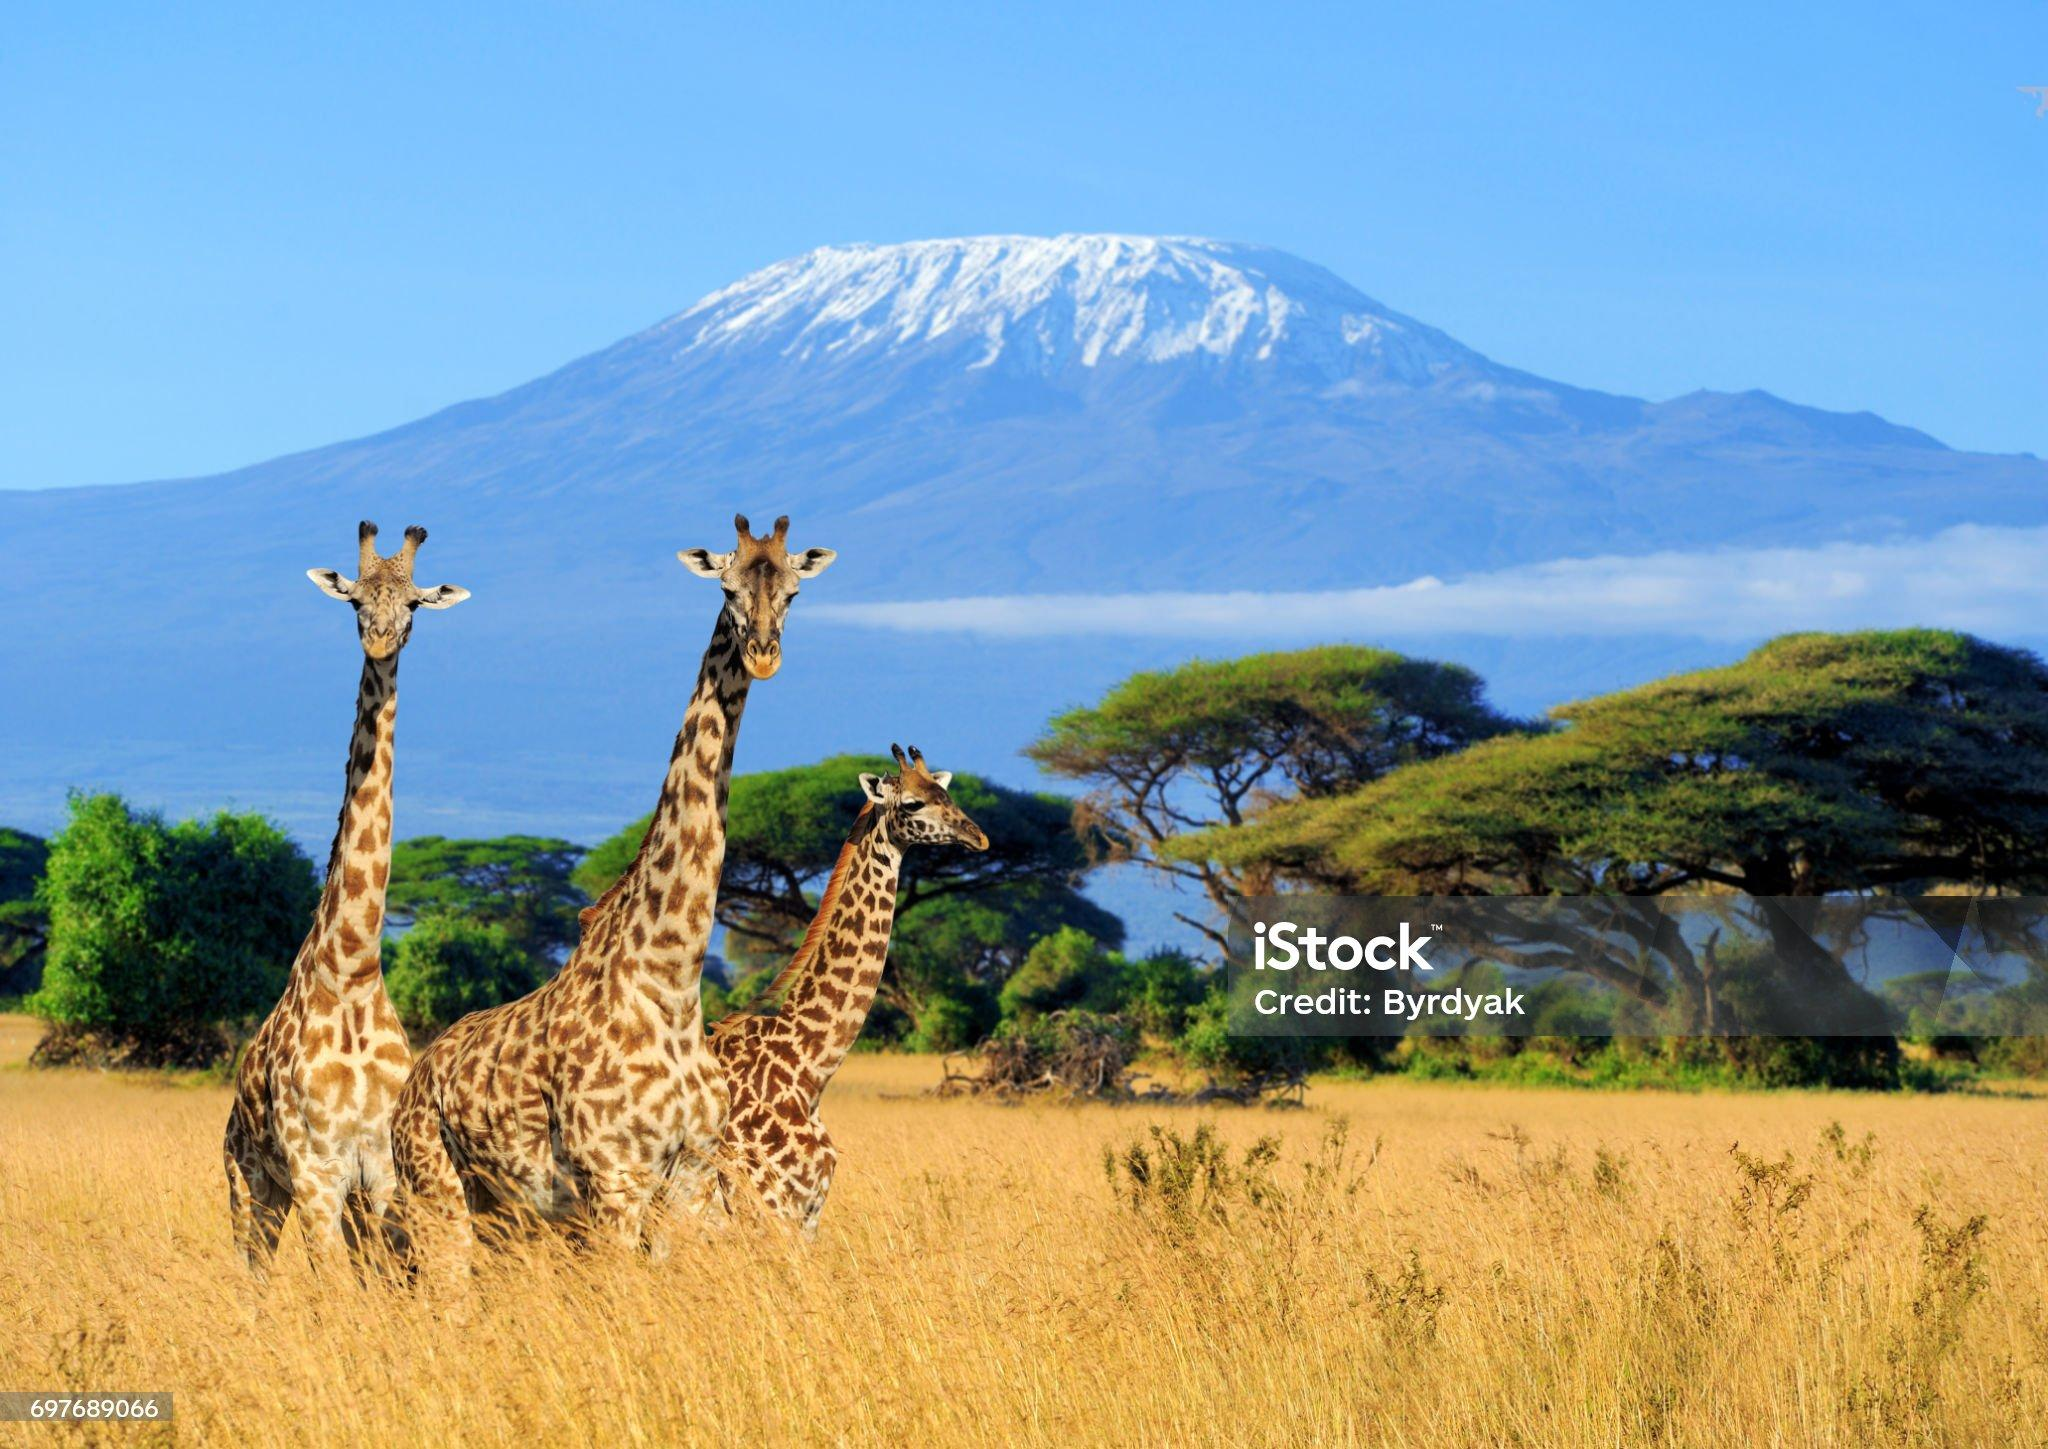

In [9]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    PIL 이미지를 Base64로 인코딩된 문자열로 변환합니다.

    :param pil_image: PIL 이미지
    :return: 크기 조정된 Base64 문자열
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # 필요한 경우 형식을 변경할 수 있습니다.
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Base64로 인코딩된 문자열을 이미지로 표시합니다.

    :param img_base64:  Base64 문자열
    """
    # Base64 문자열을 소스로 사용하여 HTML img 태그 생성
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # HTML을 렌더링하여 이미지 표시
    display(HTML(image_html))


file_path = "../images/기린.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)


In [11]:
from langchain_core.output_parsers import StrOutputParser
from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage

# ChatOllama 언어 모델을 초기화하고 온도를 0으로 설정합니다.
llm = ChatOllama(model="llava:7b", temperature=0)


def prompt_func(data):  # 프롬프트 함수를 정의합니다.
    text = data["text"]  # 데이터에서 텍스트를 가져옵니다.
    image = data["image"]  # 데이터에서 이미지를 가져옵니다.

    image_part = {  # 이미지 부분을 정의합니다.
        "type": "image_url",  # 이미지 URL 타입을 지정합니다.
        "image_url": f"data:image/jpeg;base64,{image}",  # 이미지 URL을 생성합니다.
    }

    content_parts = []  # 콘텐츠 부분을 저장할 리스트를 초기화합니다.

    text_part = {"type": "text", "text": text}  # 텍스트 부분을 정의합니다.

    content_parts.append(image_part)  # 이미지 부분을 콘텐츠 부분에 추가합니다.
    content_parts.append(text_part)  # 텍스트 부분을 콘텐츠 부분에 추가합니다.

    return [HumanMessage(content=content_parts)]  # HumanMessage 객체를 반환합니다.

# from langchain.prompts import PromptTemplate
# template = """한국어로 대답하세요. 존댓말로 답변해주세요. 그림의 제목과 그림의 설명으로 글을 작성하세요.
# QUESTION: {text}

# Title: 

# Explanation: """
# prompt = PromptTemplate.from_template(template)


# 프롬프트 함수, 언어 모델, 출력 파서를 연결하여 체인을 생성합니다.
chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(  # 체인을 호출하여 쿼리를 실행합니다.
    # 텍스트와 이미지를 전달합니다.
    {"text": "한국어로 대답하세요. 존댓말로 답변해주세요. 그림의 제목과 그림의 설명으로 글을 작성하세요.", "image": image_b64}
)

print(query_chain)  # 쿼리 결과를 출력합니다.


 제목: "삼대의 곰팡과 높은 산"

설명: "이 이미지에서는 삼대의 곰팡이 큰 산 앞에 있습니다. 그들은 자연적인 환경에서 놀고 있으며, 그들의 위치와 상태는 매우 생동감 있습니다. 이 이미지는 곰팡과 산을 보여주는 자연 샷팅 이미지입니다." 
